In [19]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_keiko as ff
import feature_finder1 as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import stats

# confidence interval

In [20]:
from scipy import stats
from numpy import *
s = 3
n=10
c1,c2 = stats.chi2.ppf([0.025,1-0.025],n)
y = zeros(50000)
for i in range(len(y)):
    y[i] =sqrt( mean((random.randn(n)*s)**2))

print("1-alpha={}".format((mean( (sqrt(n/c2)*y < s) & (sqrt(n/c1)*y > s)),)))

1-alpha=(0.94998,)


In [345]:
f = 12
test_start = 2011
test_end = 2015
n_components_sst = 57
n_components_soil = 40
N = 303

In [349]:
upper = []
lower = []
pcmci = []
upper_base = []
lower_base = []
base = []
for tau in np.arange(1,13):
    pred = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    test = np.load("../../whole_data_results/ET_orac/pcmci_data/test_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    
    test = test/N
    pred = pred/N
    n=len(test)
    c1,c2 = stats.chi2.ppf([0.025,1-0.025],n)
    RMSE_temp = np.sqrt(mean_squared_error(test,pred))
    #pcmci.append(RMSE_temp)
    #upper.append(np.sqrt(n/c1)*RMSE_temp)
    #lower.append(np.sqrt(n/c2)*RMSE_temp)
    
    MSE = mean_squared_error(test,pred)
    pcmci.append(MSE)
    upper.append(MSE + 1.96 * np.std((test - pred)**2)/np.sqrt(n))
    lower.append(MSE - 1.96 * np.std((test - pred)**2)/np.sqrt(n))
    
    
    
    pred_base = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    test_base = np.load("../../whole_data_results/ET_orac/pcmci_data/test_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
    
    test_base = test_base/N
    pred_base = pred_base/N
    n=len(test_base)
    c1,c2 = stats.chi2.ppf([0.025,1-0.025],n)
    #RMSE_temp = np.sqrt(mean_squared_error(test_base,pred_base))
    #base.append(RMSE_temp)
    #upper_base.append(np.sqrt(n/c1)*RMSE_temp)
    #lower_base.append(np.sqrt(n/c2)*RMSE_temp)
    
    MSE_base = mean_squared_error(test_base,pred_base)
    base.append(MSE_base)
    upper_base.append(MSE_base + 1.96 * np.std((test_base - pred_base)**2)/np.sqrt(n))
    lower_base.append(MSE_base - 1.96 * np.std((test_base - pred_base)**2)/np.sqrt(n))

In [304]:
lower = np.sqrt(lower)/N
upper = np.sqrt(upper)/N
pcmci = np.sqrt(pcmci)/N

lower_base = np.sqrt(lower_base)/N
upper_base = np.sqrt(upper_base)/N
base = np.sqrt(base)/N

In [350]:
lower = np.array(lower)
upper = np.array(upper)
lower_base = np.array(lower_base)
upper_base = np.array(upper_base)

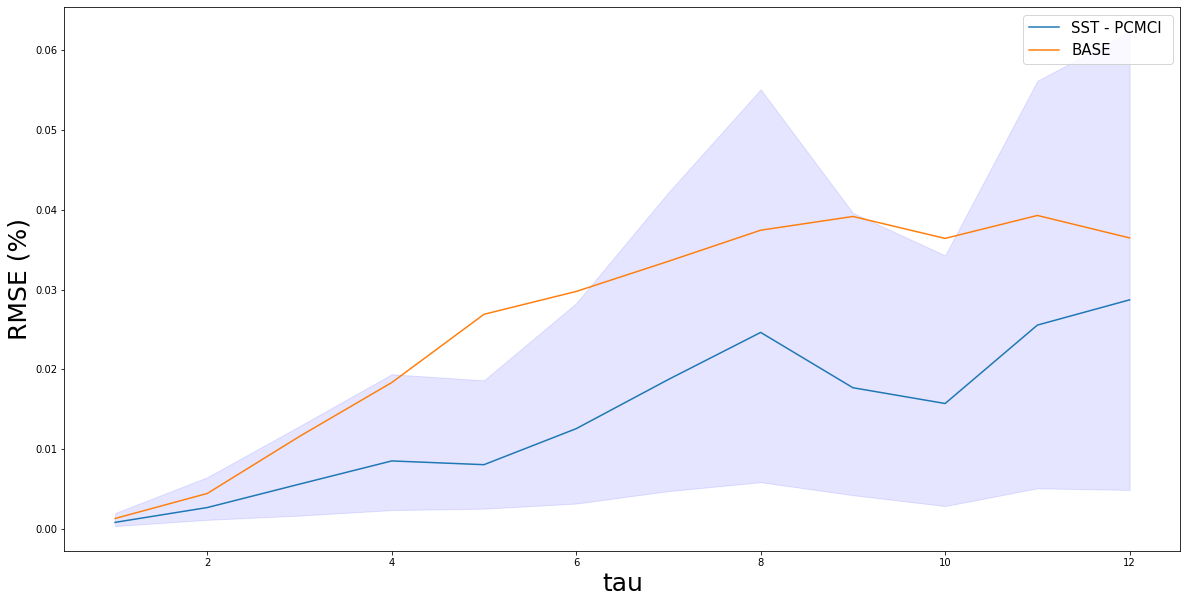

In [351]:
tau = np.arange(1,13)
fig, ax = plt.subplots()
ax.plot(tau,pcmci,label = 'SST - PCMCI ')
ax.fill_between(tau, (pcmci-lower), (pcmci+upper), color='b', alpha=.1)

ax.plot(tau,base, label  ='BASE')
#ax.fill_between(tau, (base-lower_base), (base+upper_base), color='r', alpha=.1)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.xlabel("tau",fontsize = 25)
ax.legend(fontsize=15)
fig.savefig("CIcpcmciSST.png")

In [68]:
base

[9.417055054593974e-05,
 0.00017060362295532892,
 0.00024717159989041086,
 0.0003045828517916415,
 0.0002960712417598783,
 0.00036995985677225666,
 0.00045173903624369874,
 0.0005179883220977547,
 0.0004390443998648253,
 0.0004137850034370051,
 0.0005275496852441079,
 0.0005592942007565128]

In [70]:
pcmci

[0.028533676815419746,
 0.051692897755464665,
 0.07489299476679451,
 0.09228860409286739,
 0.08970958625324313,
 0.11209783660199377,
 0.1368769279818407,
 0.15695046159561965,
 0.13303045315904208,
 0.12537685604141252,
 0.1598475546289647,
 0.16946614282922337]

In [36]:
n=len(test)
c1,c2 = stats.chi2.ppf([0.025,1-0.025],n)

In [32]:
test = test/N

In [33]:
pred = pred/N

In [34]:
np.std(test - pred)

0.022517268811634916

In [35]:
np.sqrt(np.mean((test - pred))**2)

0.008541137328284652

In [24]:
np.sqrt(n/c2)

0.8339211835659456

In [37]:
RMSE = np.sqrt(mean_squared_error(test,pred))

In [38]:
RMSE

0.024082741156189923

In [39]:
np.sqrt(n/c1)*RMSE

0.030086534097545643

In [40]:
np.sqrt(n/c2)*RMSE

0.02008310800848221

In [38]:
pred_base = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
test_base = np.load("../../whole_data_results/ET_orac/pcmci_data/test_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))

In [45]:
RMSE_base = np.sqrt(mean_squared_error(pred_base,test_base))

In [46]:
np.sqrt(n/c1)*RMSE_base

74.87754857751463

In [47]:
np.sqrt(n/c2)*RMSE_base

47.184606002089325

In [56]:
np.std((test - pred)**2)/np.sqrt(n)

228.63781837724633

In [57]:
MSE = mean_squared_error(test,pred)

In [59]:
MSE - 1.96 * np.std((test - pred)**2)/np.sqrt(n)

2188.5117582477583

In [58]:
MSE + 1.96 * np.std((test - pred)**2)/np.sqrt(n)

3084.772006286564

In [60]:
MSE_base = mean_squared_error(test_base,pred_base)

In [61]:
MSE_base - 1.96 * np.std((test_base - pred_base)**2)/np.sqrt(n)

2669.5488480577396

In [62]:
MSE_base + 1.96 * np.std((test_base - pred_base)**2)/np.sqrt(n)

4029.827066400957

In [ ]:
x= np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [13]:
tau = 1

In [29]:
pred = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
test = np.load("../../whole_data_results/ET_orac/pcmci_data/test_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))

In [17]:
n = len(test)

In [16]:
MSE = mean_squared_error(test,pred)

In [18]:
MSE - 1.96 * np.std((test - pred)**2)/np.sqrt(n)

42.97106509554423

In [19]:
MSE + 1.96 * np.std((test - pred)**2)/np.sqrt(n)

106.52533281189524

In [15]:
pred_base = np.load("../../whole_data_results/ET_orac/pcmci_data/pred_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))
test_base = np.load("../../whole_data_results/ET_orac/pcmci_data/test_base_{}_{}_{}_{}_{}.npy".format(f,test_start,test_end,tau,n_components_sst))

In [ ]:
test = test/303
pred = pred/303

# ET

In [35]:
corr_soil = []
pcmci_soil = []
base = []
n_components_soil = 40
n_components_soil = 57
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 303
for tau in range(1,13,1):
    base.append(np.nanmean(np.load("../../whole_data_results/ET_orac/corr_soil/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))))
    corr_soil.append(np.nanmean(np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))))
    pcmci_soil.append(np.nanmean(np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))))


In [2]:
base = np.array(base)/N

NameError: name 'base' is not defined

In [2]:
n_components_soil = 40
n_components_soil = 57
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 303

In [5]:
corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))
enso = np.zeros((12,29))
MI = np.zeros((12,29))

In [6]:
for tau in np.arange(1,13):
    corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    enso[tau-1,] = np.load("../../whole_data_results/ET_orac/enso/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    MI[tau-1,] = np.load("../../whole_data_results/ET_orac/MI/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [8]:
test_start = 1985
test_end = 2015
enso = np.zeros((12,27))
for tau in np.arange(1,13):
    enso[tau-1,] = np.load("../../whole_data_results/ET_orac/enso/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [6]:
d = base[11,:] - pcmci[11,:]

In [10]:
def studentT_test_one(var, h_mean = 0):
    n = len(var)
    mean = np.mean(var)
    std = np.std(var)

    t_test = (mean - h_mean) / (std/math.sqrt(n)) 
    p_value = 1 - stats.t.cdf(t_test, n - 1)
    
    return(t_test, p_value)

In [76]:
for i in range(12):
    d = corr_soil[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:1.5388534010542685 p:0.1350658486723409
Tau:2 T:-1.7545910243578593 p:0.09026846274899818
Tau:3 T:-0.1355319632005767 p:0.893160971951896
Tau:4 T:0.7869683769123038 p:0.43791113105815926
Tau:5 T:0.6621119824871815 p:0.5133125448800187
Tau:6 T:0.7942045536763472 p:0.43375635181371897
Tau:7 T:1.5757828381907706 p:0.12630857605406992
Tau:8 T:0.4849708201861922 p:0.6314697877700062
Tau:9 T:0.6237702573217564 p:0.5378274884348843
Tau:10 T:-0.35662593503490897 p:0.7240453756575042
Tau:11 T:1.3440532315252056 p:0.18972112234852379
Tau:12 T:-1.5763894409881947 p:0.1261687120381649


In [8]:
for i in range(12):
    d = base[i,:] - MI[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:0.028815824268962342 p:0.9772158906164254
Tau:2 T:0.7047808256617032 p:0.48676816886684315
Tau:3 T:2.7886878804784394 p:0.00940786210171102
Tau:4 T:4.186088915548988 p:0.000254649671994671
Tau:5 T:3.9707665624812467 p:0.0004544443833257933
Tau:6 T:3.8826676137350424 p:0.0005750565009416797
Tau:7 T:4.127933545581622 p:0.0002979132707595095
Tau:8 T:4.519775677872881 p:0.0001029576647426068
Tau:9 T:3.3819321853389583 p:0.0021398806261926926
Tau:10 T:2.85731429708282 p:0.007969960514476019
Tau:11 T:3.267611992657836 p:0.0028679520192057663
Tau:12 T:2.9464229252439305 p:0.0064107489207339075


In [9]:
for i in range(12):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:0.25313025221054275 p:0.8020168499574243
Tau:2 T:1.1198550794253426 p:0.2722899114017719
Tau:3 T:3.5317511709236995 p:0.001451383316465682
Tau:4 T:4.108235181646879 p:0.0003141517504230896
Tau:5 T:4.194394699589121 p:0.0002489997930538624
Tau:6 T:4.385244940409286 p:0.00014846166227915815
Tau:7 T:4.805395875972455 p:4.7214815990967204e-05
Tau:8 T:4.0508252602094394 p:0.0003666189382092893
Tau:9 T:3.0738148389965874 p:0.004675988225147834
Tau:10 T:3.602326144696252 p:0.0012068895033200664
Tau:11 T:4.276086367704763 p:0.00019962735542706245
Tau:12 T:3.67815270075407 p:0.0009888783707653899


In [10]:
tau = 12

In [15]:
corr1 = np.sqrt(corr[tau-1,2:])/N
pcmci1 = np.sqrt(pcmci[tau-1,2:])/N
corr_soil1 = np.sqrt(corr_soil[tau-1,2:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,2:])/N
base1 = np.sqrt(base[tau-1,2:])/N
enso1 = np.sqrt(enso[tau-1,:])/N
MI1 = np.sqrt(MI[tau-1,2:])/N

In [17]:
corr1 = np.sqrt(corr[tau-1,:])/N
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
corr_soil1 = np.sqrt(corr_soil[tau-1,:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N
enso1 = np.sqrt(enso[tau-1,:])/N
MI1 = np.sqrt(MI[tau-1,:])/N

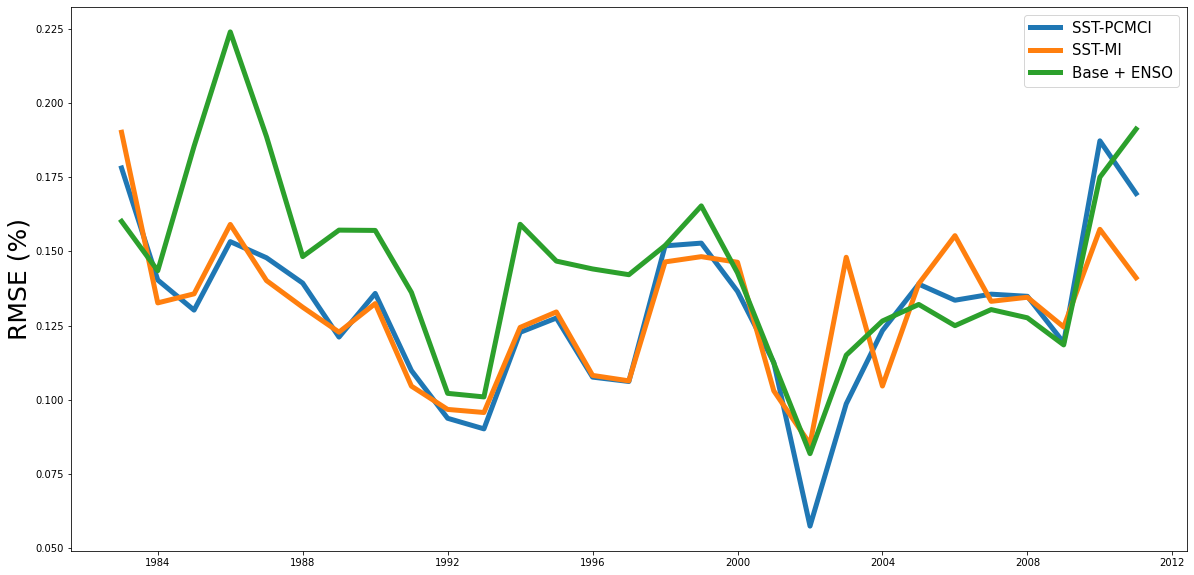

In [21]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
#plt.plot(x,base1,label = 'Base', linewidth = 2)
#plt.plot(x,corr1, label = 'SST-CORR', linewidth = 5)
plt.plot(x,pcmci1, label = 'SST-PCMCI', linewidth = 5)
plt.plot(x,MI1, label = 'SST-MI', linewidth = 5)
#plt.plot(x,corr_soil1, label = 'Soil Moisture-CORR', linewidth = 5)
#plt.plot(x,pcmci_soil1, label = 'Soil Moisture-PCMCI', linewidth = 5)
plt.plot(x,enso1, label = 'Base + ENSO', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
#plt.savefig("diff3.png")

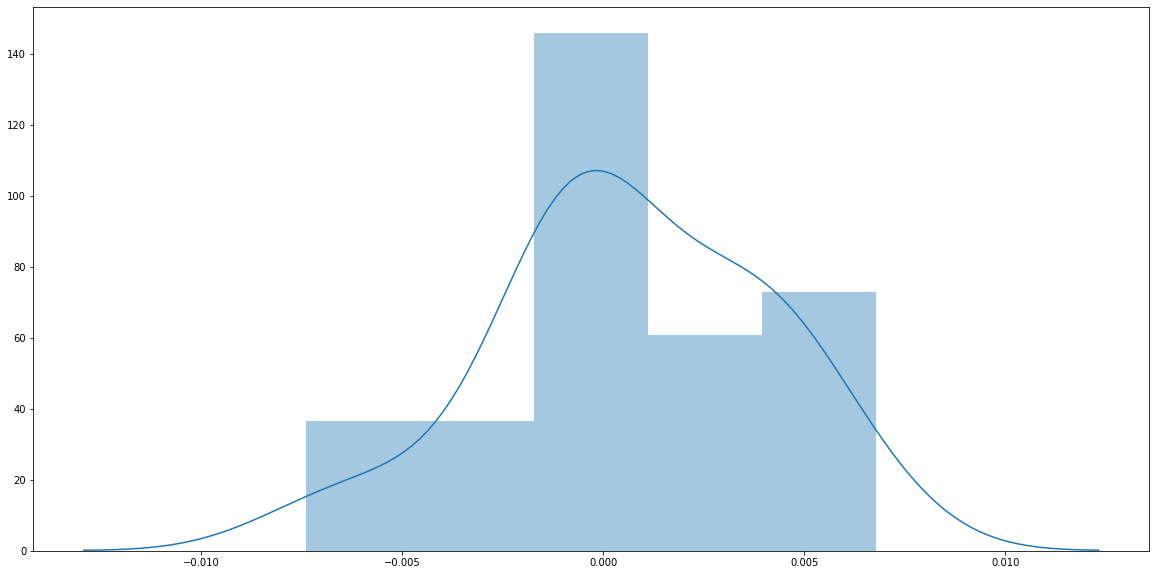

In [281]:
sns_plot = sns.distplot(base1 - corr1)
fig = sns_plot.get_figure()
fig.savefig("diff1dist")

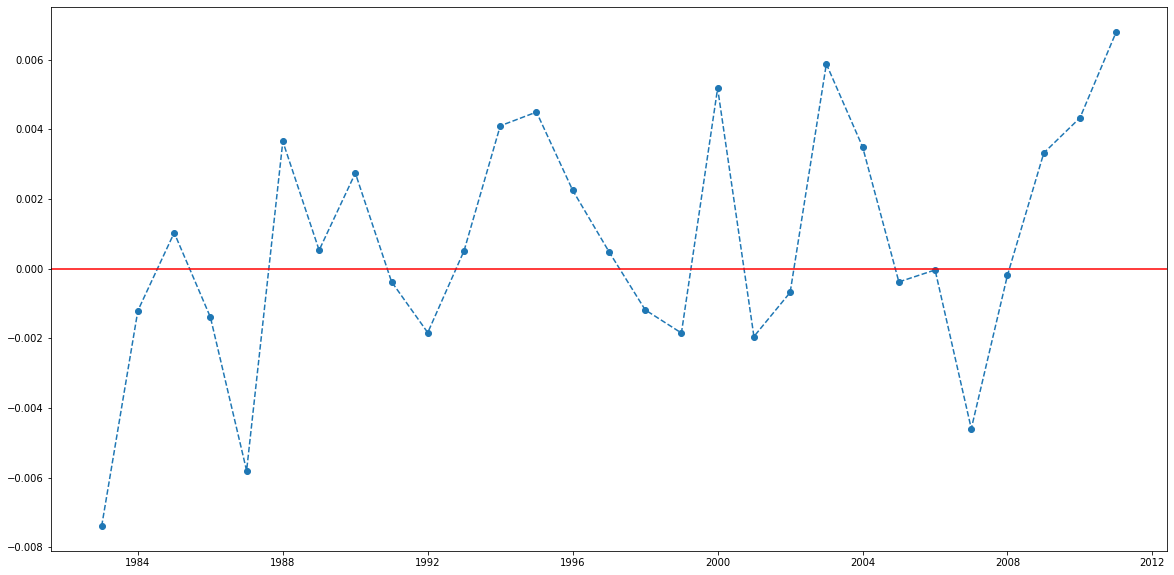

In [282]:
plt.plot(x,base1 - corr1,linestyle='--', marker='o')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.savefig("diff1one.png")

In [288]:
box = np.sqrt(box)/N

In [284]:
taus = np.arange(1,13)

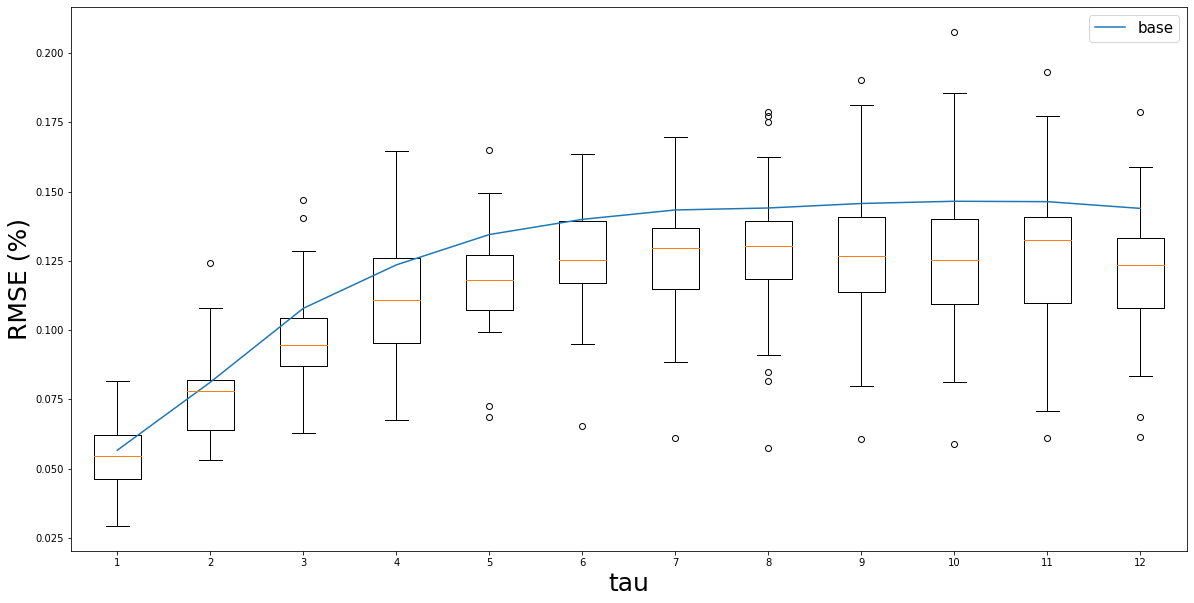

In [342]:
plt.boxplot(np.transpose(box));
plt.plot(taus,np.transpose(base),label = 'base')
plt.legend(fontsize = 15)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.xlabel("tau",fontsize = 25)
plt.savefig("boxplot.png")

# Aw

In [11]:
f = 12
step = 1
test_start = 2011
test_end = 2015
test_start_soil = 1983
test_end_soil = 2015
#N = 117  #AW
#N = 83 #BSh
N = 63 #Cwb
class_name = 'Cwb'
n_components_sst = 57


#corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))

for tau in np.arange(1,13):
    #corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_{}/model_{}_{}_{}_{}_57.npy".format(class_name,f,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_{}/model_{}_{}_{}_{}_57.npy".format(class_name,f,test_start,test_end,tau))
   # corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_{}_soil/model_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start_soil,test_end_soil,tau))
   # pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_{}_soil/model_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start_soil,test_end_soil,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_{}/base_{}_{}_{}_{}_57.npy".format(class_name,f,test_start,test_end,tau))

In [5]:
for i in range(12):
    d = base[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:1.7100181935566419 p:0.09832352751394335
Tau:2 T:0.5107728231884981 p:0.6135139787870734
Tau:3 T:-0.7439151459567165 p:0.4631253601256792
Tau:4 T:-0.30225492500420825 p:0.764691614513138
Tau:5 T:-0.307879064536615 p:0.7604530112072726
Tau:6 T:0.26211737879673014 p:0.7951497464746976
Tau:7 T:-0.9728510500793776 p:0.3389573458078765
Tau:8 T:0.5771426027482277 p:0.5684550172347506
Tau:9 T:0.746633284601677 p:0.46150862363115464
Tau:10 T:0.9292360987183159 p:0.3607090551202351
Tau:11 T:2.309913751317733 p:0.028480720075490105
Tau:12 T:1.99213842198482 p:0.05618843888725121


In [12]:
for i in range(12):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:3.3905047054330866 p:0.002093143707254198
Tau:2 T:2.3390790525688296 p:0.02669492342647697
Tau:3 T:1.8616333442881519 p:0.07318272946224058
Tau:4 T:0.6616658270603494 p:0.5135942425158454
Tau:5 T:0.31612860277959576 p:0.7542495183863808
Tau:6 T:-0.17309708197657828 p:0.8638203731693803
Tau:7 T:0.5340243896505069 p:0.5975393914308018
Tau:8 T:-0.15497066563354475 p:0.8779561821041003
Tau:9 T:0.6778260431234914 p:0.5034451943355458
Tau:10 T:1.438686743483173 p:0.16132451538664824
Tau:11 T:2.0988182595122646 p:0.04497542935480753
Tau:12 T:1.6865835100473439 p:0.10279601426995845


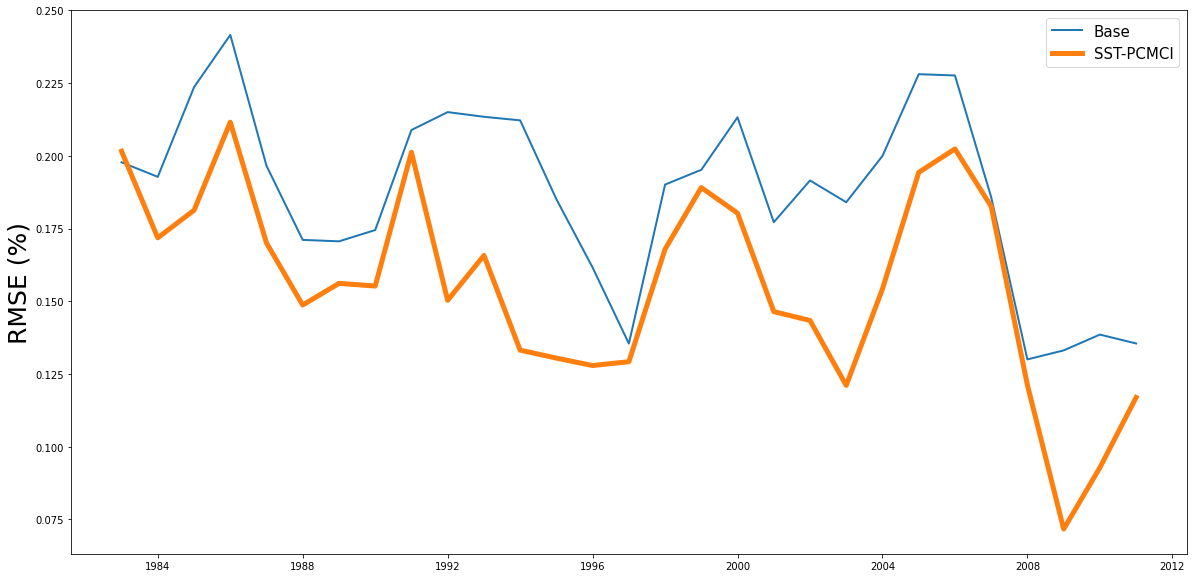

In [31]:
tau = 12

#corr1 = np.sqrt(corr[tau-1,:])/N
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
#corr_soil1 = np.sqrt(corr_soil[tau-1,2:])/N
#pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,2:])/N
base1 = np.sqrt(base[tau-1,:])/N
#enso1 = np.sqrt(enso[tau-1,:])/N

x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
#plt.plot(x,corr1, label = 'SST-CORR', linewidth = 5)
plt.plot(x,pcmci1, label = 'SST-PCMCI', linewidth = 5)
#plt.plot(x,corr_soil1, label = 'Soil Moisture-CORR', linewidth = 5)
#plt.plot(x,pcmci_soil1, label = 'Soil Moisture-PCMCI', linewidth = 5)
#plt.plot(x,enso1, label = 'Base + ENSO', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
#plt.savefig("diff3.png")

# Hybrid

In [17]:
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 303

In [18]:
corr_sst = np.zeros((12,29))
pcmci_sst = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
pcmci_h = np.zeros((12,29))
#corr_h = np.zeros((12,29))
base = np.zeros((12,29))

In [19]:
for tau in np.arange(1,13):
    corr_sst[tau-1,] = np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_sst[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    #base[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [20]:
for tau in np.arange(1,13):
    #corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    pcmci_h[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_hybrid/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_hybrid/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    

In [21]:
for i in range(12):
    d = base[i,:] - pcmci_h[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.3079843647226221 p:0.7603737240713314
Tau:2 T:0.9982607888328563 p:0.3267022937023105
Tau:3 T:2.3379093578695467 p:0.026764536585055516
Tau:4 T:3.3810232158158557 p:0.002144894975044304
Tau:5 T:3.7450663359255256 p:0.0008287598110050853
Tau:6 T:3.7114712169762254 p:0.0009057012981339579
Tau:7 T:4.590211008188643 p:8.497196811536996e-05
Tau:8 T:2.8181133222065684 p:0.008763740384573579
Tau:9 T:4.804075994270758 p:4.738545393160608e-05
Tau:10 T:2.9011496644521415 p:0.007162834566136975
Tau:11 T:4.274092058404093 p:0.00020070862923368313
Tau:12 T:3.4488152160498275 p:0.001800428883917672


In [23]:
for i in range(12):
    d = pcmci_sst[i,:] - pcmci_h[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.7740731871602494 p:0.44537468656098533
Tau:2 T:-0.8036100514457647 p:0.4283920715643963
Tau:3 T:-2.0553737420003197 p:0.04927729215756405
Tau:4 T:-0.30186122516032377 p:0.7649886046030913
Tau:5 T:-0.3030706130792504 p:0.7640764109427702
Tau:6 T:-0.28232815392614274 p:0.7797683850105441
Tau:7 T:1.0445871158188649 p:0.3051487316883888
Tau:8 T:-0.2007182756087036 p:0.8423697450433514
Tau:9 T:2.507853620093338 p:0.01821922808206015
Tau:10 T:0.5742394259487101 p:0.5703907129942529
Tau:11 T:2.815902455047714 p:0.008810656104151436
Tau:12 T:0.2539675775100647 p:0.8013763550067287


In [30]:
tau = 11

In [31]:
#corr1 = np.sqrt(corr[tau-1,:])/N
pcmci_sst1 = np.sqrt(pcmci_sst[tau-1,:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,:])/N
pcmci_h1 = np.sqrt(pcmci_h[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N

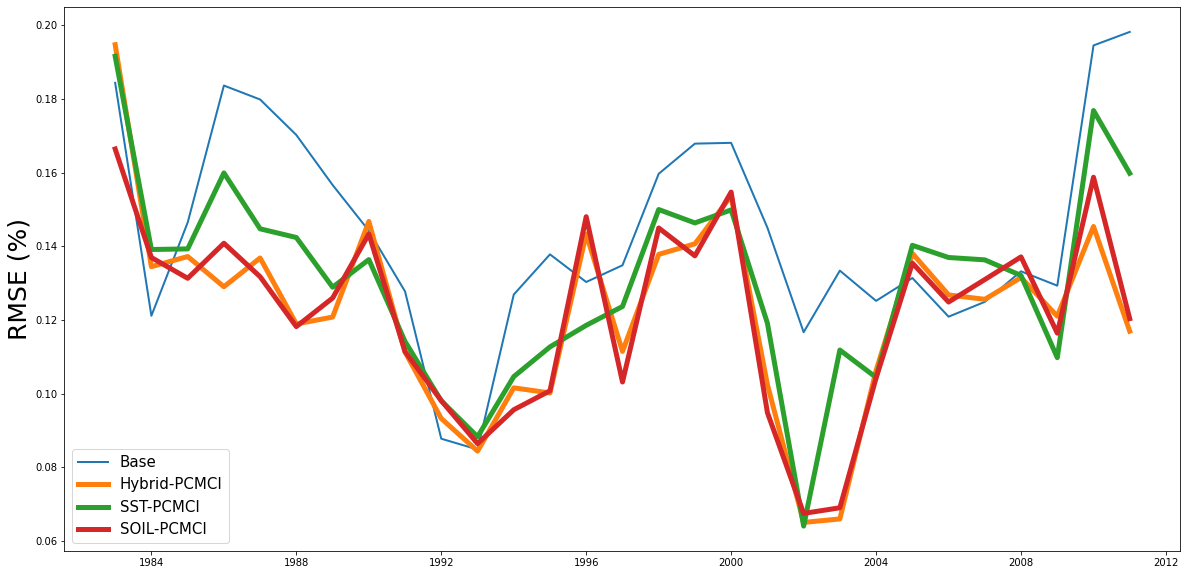

In [32]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
#plt.plot(x,corr1, label = 'SST-CORR', linewidth = 5)
plt.plot(x,pcmci_h1, label = 'Hybrid-PCMCI', linewidth = 5)
plt.plot(x,pcmci_sst1, label = 'SST-PCMCI', linewidth = 5)
plt.plot(x,pcmci_soil1, label = 'SOIL-PCMCI', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
#plt.savefig("diff3.png")

In [ ]:



d = base[11,:] - pcmci[11,:]

def studentT_test_one(var, h_mean = 0):
    n = len(var)
    mean = np.mean(var)
    std = np.std(var)

    t_test = (mean - h_mean) / (std/math.sqrt(n)) 
    p_value = 1 - stats.t.cdf(t_test, n - 1)
    
    return(t_test, p_value)


for i in range(12):
    d = base[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))





# ZW

In [7]:
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 175
cc = 'ZW'

In [8]:
corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))
enso = np.zeros((12,29))

In [9]:
for tau in np.arange(1,13):
    corr[tau-1,] = np.load("../../whole_data_results/{}/corr/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/{}/pcmci/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    corr_soil[tau-1,] = np.load("../../whole_data_results/{}/corr_soil/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    pcmci_soil[tau-1,] = np.load("../../whole_data_results/{}/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/{}/corr_soil/base_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    enso[tau-1,] = np.load("../../whole_data_results/{}/enso/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))

In [36]:
test_start = 1985
test_end = 2015
enso = np.zeros((12,27))
for tau in np.arange(1,13):
    enso[tau-1,] = np.load("../../whole_data_results/ZW/enso/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))

In [10]:
for i in range(12):
    d = enso[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:0.06666331487394478 p:0.9473234742797918
Tau:2 T:2.2445627807490576 p:0.03288176078772203
Tau:3 T:2.537747891534465 p:0.017006097293621503
Tau:4 T:2.6295086119642193 p:0.013733588231073308
Tau:5 T:2.9729215269120335 p:0.006005935224010849
Tau:6 T:3.0585754980825537 p:0.004857098605997505
Tau:7 T:1.3402580350143587 p:0.19093636048490759
Tau:8 T:1.1035764727723927 p:0.27917139463487967
Tau:9 T:1.8539032908313582 p:0.07431585821447449
Tau:10 T:2.416687551034145 p:0.022428484864405063
Tau:11 T:2.1759997926938155 p:0.038150179515740554
Tau:12 T:2.5104432163862183 p:0.018111062542227087


In [40]:
for i in range(12):
    d = base[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.24496289873136057 p:0.8082715930430362
Tau:2 T:-0.3570524882988933 p:0.7237295381836542
Tau:3 T:-0.773755197334906 p:0.4455596956876091
Tau:4 T:-0.12898438376021934 p:0.8982920713466486
Tau:5 T:0.2874751138937905 p:0.7758655076390154
Tau:6 T:0.3999647068108306 p:0.6922175388759088
Tau:7 T:0.17589962607431903 p:0.861638793483802
Tau:8 T:0.6378611864754964 p:0.5287464465006606
Tau:9 T:0.6553370759590537 p:0.5175992669185838
Tau:10 T:1.6405993612227001 p:0.11206821565456412
Tau:11 T:3.656776904760128 p:0.0010461155692479403
Tau:12 T:1.586254069080027 p:0.12391202727042991


In [41]:
for i in range(12):
    d = base[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:-0.24496289873136057 p:0.8082715930430362
Tau:2 T:-0.3570524882988933 p:0.7237295381836542
Tau:3 T:-0.773755197334906 p:0.4455596956876091
Tau:4 T:-0.12898438376021934 p:0.8982920713466486
Tau:5 T:0.2874751138937905 p:0.7758655076390154
Tau:6 T:0.3999647068108306 p:0.6922175388759088
Tau:7 T:0.17589962607431903 p:0.861638793483802
Tau:8 T:0.6378611864754964 p:0.5287464465006606
Tau:9 T:0.6553370759590537 p:0.5175992669185838
Tau:10 T:1.6405993612227001 p:0.11206821565456412
Tau:11 T:3.656776904760128 p:0.0010461155692479403
Tau:12 T:1.586254069080027 p:0.12391202727042991


In [42]:
for i in range(12):
    d = base[i,:] - corr[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:2.043021542399145 p:0.05056509905387482
Tau:2 T:1.1482971927464325 p:0.26056192919227017
Tau:3 T:0.3150484141768259 p:0.7550608588882421
Tau:4 T:0.9207888419730592 p:0.3650264644590201
Tau:5 T:0.7638510868521221 p:0.45134506642930716
Tau:6 T:1.1764245333489205 p:0.24933038225405196
Tau:7 T:1.479434499293842 p:0.15018813324726982
Tau:8 T:2.6310417388255067 p:0.013684253293183922
Tau:9 T:2.9206633772545585 p:0.006828964881149784
Tau:10 T:2.377639337768216 p:0.02449035200861919
Tau:11 T:5.491343487555265 p:7.253021624610544e-06
Tau:12 T:5.532442862583823 p:6.485684681322975e-06


In [41]:
for i in range(12):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:2.2202934283090703 p:0.03466660288752954
Tau:2 T:1.714801189050999 p:0.09743110857414855
Tau:3 T:1.2906605722177673 p:0.20737747102033338
Tau:4 T:0.5361805476279075 p:0.5960681855967377
Tau:5 T:1.4875530998130129 p:0.14804485053842392
Tau:6 T:2.0094091436320713 p:0.054221026485182545
Tau:7 T:2.2268683233745286 p:0.034174643044267004
Tau:8 T:2.637529720690375 p:0.013477295098132964
Tau:9 T:3.3535797165369994 p:0.0023017436271401885
Tau:10 T:3.600220512704272 p:0.00121356692561194
Tau:11 T:4.757311875429582 p:5.384522201554428e-05
Tau:12 T:4.950345570921536 p:3.1766517962285476e-05


In [50]:
tau = 12

In [51]:
corr1 = np.sqrt(corr[tau-1,:])/N
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
corr_soil1 = np.sqrt(corr_soil[tau-1,:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N

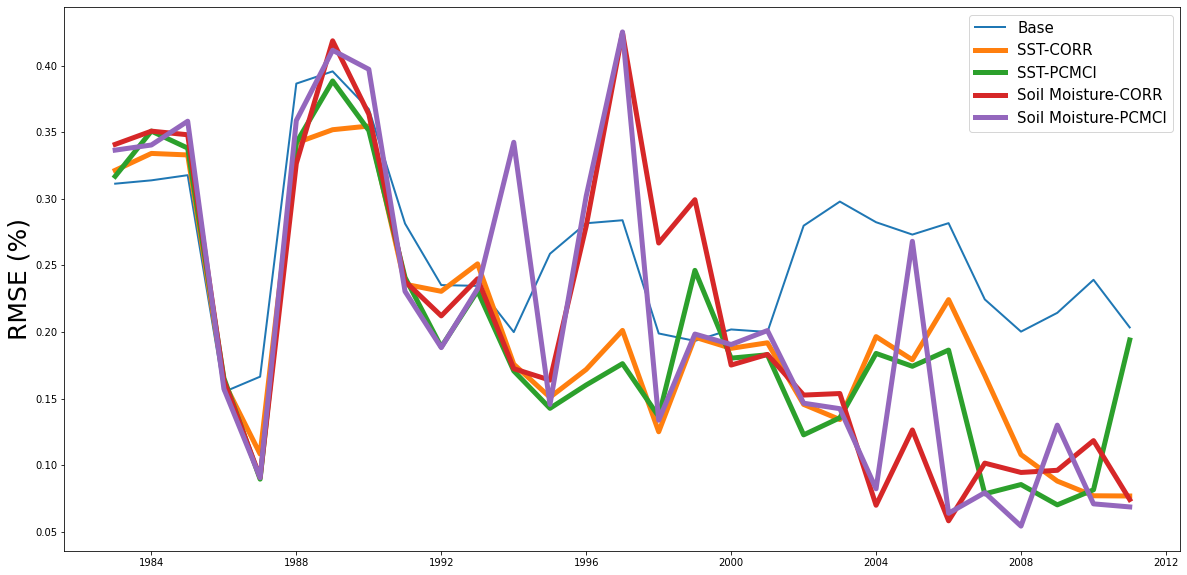

In [52]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
plt.plot(x,corr1, label = 'SST-CORR', linewidth = 5)
plt.plot(x,pcmci1, label = 'SST-PCMCI', linewidth = 5)
plt.plot(x,corr_soil1, label = 'Soil Moisture-CORR', linewidth = 5)
plt.plot(x,pcmci_soil1, label = 'Soil Moisture-PCMCI', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
plt.savefig("diff9zim.png")

# NE

In [11]:
f = 12
step = 1
test_start = 1983
test_end = 2015
N = 375
cc = 'NE'

corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
corr_soil = np.zeros((12,29))
pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))
enso = np.zeros((12,29))

In [13]:
for tau in np.arange(1,13):
    #corr[tau-1,] = np.load("../../whole_data_results/{}/corr/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/{}/pcmci/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    corr_soil[tau-1,] = np.load("../../whole_data_results/{}/corr_soil/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    pcmci_soil[tau-1,] = np.load("../../whole_data_results/{}/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/{}/pcmci_soil/base_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))
    enso[tau-1,] = np.load("../../whole_data_results/{}/enso/model_{}_{}_{}_{}_{}.npy".format(cc,f,step,test_start,test_end,tau))

In [14]:
for i in range(12):
    d = enso[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:1.1907627560272882 p:0.24374408523906388
Tau:2 T:2.746841732397646 p:0.010400828189989261
Tau:3 T:2.6718576022747453 p:0.012429961216068179
Tau:4 T:3.0302028350920747 p:0.005212243843958898
Tau:5 T:1.9716191681687965 p:0.058607109543434205
Tau:6 T:1.8823098285483124 p:0.07022478024816774
Tau:7 T:1.4682283965027332 p:0.15318740058304686
Tau:8 T:3.4887198410066813 p:0.0016233808535288687
Tau:9 T:0.4305157270122976 p:0.6701163767492309
Tau:10 T:2.412091621287873 p:0.02266262998725604
Tau:11 T:3.6940376309942615 p:0.0009483332183855533
Tau:12 T:2.059987443104028 p:0.04880377071280794


In [9]:
for i in range(12):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))


Tau:1 T:7.1367579558444145 p:9.131373680529213e-08
Tau:2 T:6.347174447105452 p:7.227954168052089e-07
Tau:3 T:6.557331413771547 p:4.1409974320849965e-07
Tau:4 T:6.681222152701988 p:2.988084797477651e-07
Tau:5 T:6.591724807862344 p:3.7817731901241086e-07
Tau:6 T:6.50810942689829 p:4.716238980959509e-07
Tau:7 T:6.594364836136324 p:3.7555416110030427e-07
Tau:8 T:6.547321669251154 p:4.251912771593855e-07
Tau:9 T:6.383896739751351 p:6.555584887252909e-07
Tau:10 T:6.230847351047184 p:9.855890786816003e-07
Tau:11 T:6.074046640223225 p:1.4998522328910994e-06
Tau:12 T:5.908152342207989 p:2.343752028935811e-06


In [10]:
for i in range(12):
    d = base[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))


Tau:1 T:2.0608692230114665 p:0.04871372995256229
Tau:2 T:5.5362930380195445 p:6.418125927148233e-06
Tau:3 T:2.176640114754898 p:0.03809766118317924
Tau:4 T:1.9789563171632907 p:0.057731980976612474
Tau:5 T:3.349179090691341 p:0.0023279029078391482
Tau:6 T:2.8686794370101047 p:0.007752824580754656
Tau:7 T:1.5603532155055586 p:0.12990916061947455
Tau:8 T:2.439614296108565 p:0.021293223779663927
Tau:9 T:0.5114024984836502 p:0.6130787623198488
Tau:10 T:1.9849219749833718 p:0.05702889488948971
Tau:11 T:1.919862453359185 p:0.0651164738105733
Tau:12 T:3.605769435012063 p:0.001196047017765585


In [17]:
for i in range(12):
    d = base[i,:] - corr_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:1.2424364457333792 p:0.22438086000921745
Tau:2 T:5.519447940536412 p:6.719035558947021e-06
Tau:3 T:4.6211778025867565 p:7.808871445561643e-05
Tau:4 T:2.525443533470802 p:0.017496083874827248
Tau:5 T:1.8117167132839178 p:0.08076953898764386
Tau:6 T:0.5357963994364262 p:0.5963301730206281
Tau:7 T:1.2510230213705316 p:0.22127867104782337
Tau:8 T:0.6258684479570955 p:0.5364700727490501
Tau:9 T:0.5301919932881446 p:0.6001586272302126
Tau:10 T:0.9789855775106059 p:0.33597054701991014
Tau:11 T:1.6444966505561343 p:0.11125626616015907
Tau:12 T:2.404143280677261 p:0.02307285680533473


In [18]:
for i in range(12):
    d = corr_soil[i,:] - pcmci_soil[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))


Tau:1 T:1.6058766756428857 p:0.11952176814687339
Tau:2 T:0.28577074954895215 p:0.7771572513313836
Tau:3 T:-0.9876632593339617 p:0.3317761132816238
Tau:4 T:-0.4118830729758109 p:0.6835613186689149
Tau:5 T:1.299624277459175 p:0.2043283840611485
Tau:6 T:1.319970070328681 p:0.1975353085183156
Tau:7 T:0.431079287501755 p:0.6697114255975277
Tau:8 T:1.6216858816954034 p:0.11607883720824042
Tau:9 T:-0.19501761768748924 p:0.8467873663528606
Tau:10 T:1.339061940600227 p:0.19132060422257055
Tau:11 T:0.4418257100409411 p:0.6620089791205699
Tau:12 T:1.3342606119726335 p:0.1928690626871361


In [13]:
tau = 12

corr1 = np.sqrt(corr[tau-1,:])/N
pcmci1 = np.sqrt(pcmci[tau-1,:])/N
corr_soil1 = np.sqrt(corr_soil[tau-1,:])/N
pcmci_soil1 = np.sqrt(pcmci_soil[tau-1,:])/N
base1 = np.sqrt(base[tau-1,:])/N

/home/mathsys2/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


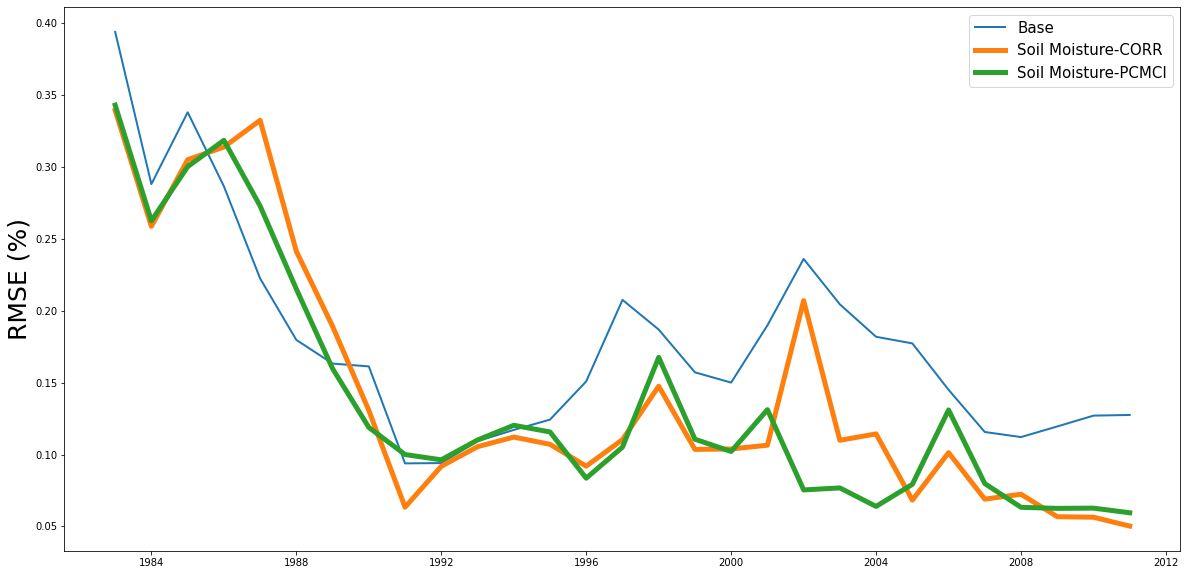

In [14]:
x = np.arange('1983-01', '2012-01', dtype='datetime64[Y]')
plt.plot(x,base1,label = 'Base', linewidth = 2)
plt.plot(x,corr_soil1, label = 'Soil Moisture-CORR', linewidth = 5)
plt.plot(x,pcmci_soil1, label = 'Soil Moisture-PCMCI', linewidth = 5)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 15)
plt.savefig("diff9zim.png")

In [28]:
taus = np.arange(1,13,1)

In [32]:
base_mean = base.mean(axis=1)/N
corr_soil_mean = corr_soil.mean(axis=1)/N
pcmci_soil_mean = pcmci_soil.mean(axis=1)/N

In [34]:
base_mean

array([ 2.18675165,  4.15834738,  5.55797034,  7.01378027,  8.01219223,
        8.90572391,  9.98834452, 11.18919606, 11.66117073, 12.43263952,
       13.27277691, 13.80132694])

In [35]:
corr_soil_mean

array([ 1.71910185,  2.57283193,  3.91660184,  5.55307769,  6.80661056,
        8.32022641,  8.62144306, 10.25166386, 10.67234229, 11.15157753,
       10.78504753, 10.60185033])

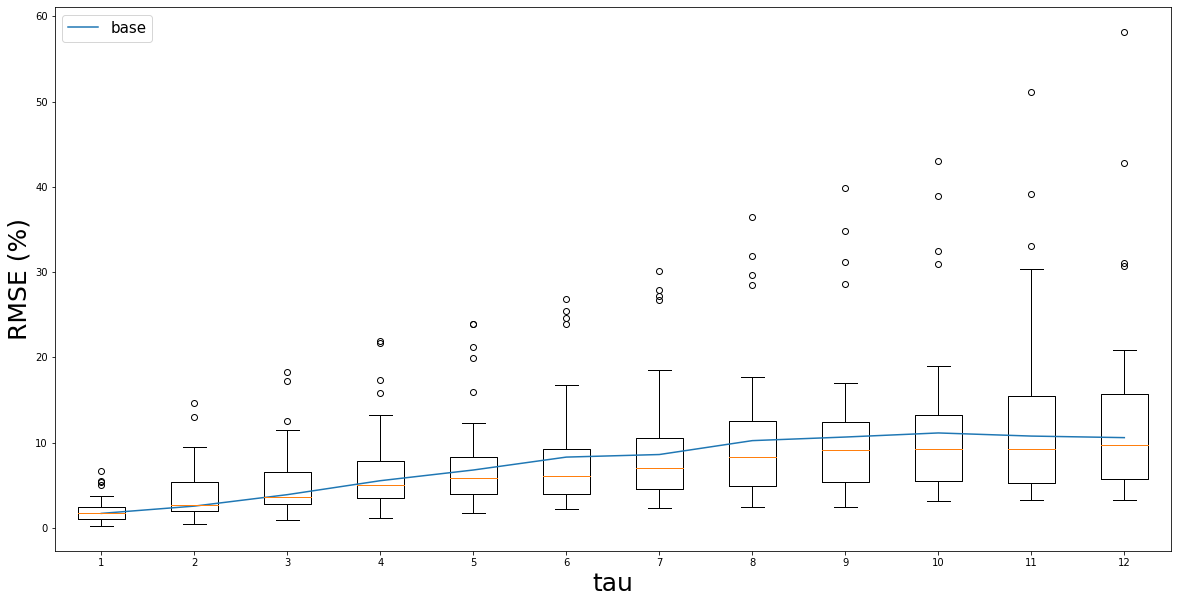

In [36]:
plt.boxplot(np.transpose(base)/N);
plt.plot(taus,np.transpose(corr_soil_mean),label = 'base')
plt.legend(fontsize = 15)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.xlabel("tau",fontsize = 25)
plt.savefig("boxplot.png")

# BWh

In [12]:
f = 12
step = 1
test_start = 1983
test_end = 2015
#N = 117  #AW
N = 305 #BWh
class_name = 'BWh'
n_components_sst = 57


corr = np.zeros((12,29))
pcmci = np.zeros((12,29))
#corr_soil = np.zeros((12,29))
#pcmci_soil = np.zeros((12,29))
base = np.zeros((12,29))

for tau in np.arange(1,12):
    #corr[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_{}/model_{}_{}_{}_{}_57.npy".format(class_name,f,test_start,test_end,tau))
    pcmci[tau-1,] = np.load("../../whole_data_results/NE/pcmci_{}/model_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start,test_end,tau))
    #corr_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    #pcmci_soil[tau-1,] = np.load("../../whole_data_results/ET_orac/pcmci_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    base[tau-1,] = np.load("../../whole_data_results/NE/pcmci_{}/base_{}_{}_{}_{}_{}.npy".format(class_name,f,step,test_start,test_end,tau))

In [13]:
for i in range(11):
    d = base[i,:] - pcmci[i,:]
    T, p = stats.ttest_1samp(d,popmean=0)
    #T, p = studentT_test_one(d)
    print("Tau:{} T:{} p:{}".format(i+1,T,p))

Tau:1 T:3.818378421528728 p:0.0006823686571460436
Tau:2 T:3.8349501903330387 p:0.0006529643689392419
Tau:3 T:2.6017713541845224 p:0.0146552250857106
Tau:4 T:3.1858981580839423 p:0.0035287419472052133
Tau:5 T:3.1229506183503086 p:0.004134902757621493
Tau:6 T:2.9612598995612576 p:0.0061810054368678724
Tau:7 T:1.9585151088191062 p:0.06019898981247249
Tau:8 T:1.845715934779537 p:0.07553246870762924
Tau:9 T:1.022199140997121 p:0.3154377146684536
Tau:10 T:2.0132954363001385 p:0.0537867551112822
Tau:11 T:3.221380236155037 p:0.0032256012496437764


In [50]:
q1, q3= np.percentile(data,[25,75])

In [54]:
iqr = q3 - q1

In [55]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [56]:
lower_bound

465.32995287512506

In [68]:
I  = (data > lower_bound) & (data < upper_bound)

In [63]:
I2 = data < upper_bound

In [69]:
I

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [157]:
upper = []
lower = []
upper_base = []
lower_base = []
base = []
corr = []
for tau in np.arange(1,13):
    
    data = np.load("../../whole_data_results/ET_orac/corr_soil/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    q1, q3= np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    I  = (data > lower_bound) & (data < upper_bound)
    data = data[I]
    
    MSE = np.mean(data)
    corr.append(MSE)
    n = len(data)
    upper.append(MSE + 1.96 * np.std(data)/np.sqrt(n))
    lower.append(MSE - 1.96 * np.std(data)/np.sqrt(n))
       
    data = np.load("../../whole_data_results/ET_orac/corr_soil/base_{}_{}_{}_{}_{}.npy".format(f,step,test_start,test_end,tau))
    q1, q3= np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    I  = (data > lower_bound) & (data < upper_bound)
    data = data[I]
    
    MSE = np.mean(data)
    base.append(MSE)
    n = len(data)
    upper_base.append(MSE + 1.96 * np.std(data)/np.sqrt(n))
    lower_base.append(MSE - 1.96 * np.std(data)/np.sqrt(n))

In [158]:
lower = np.array(lower)
upper = np.array(upper)
lower_base = np.array(lower_base)
upper_base = np.array(upper_base)
corr = np.array(corr)
base = np.array(base)

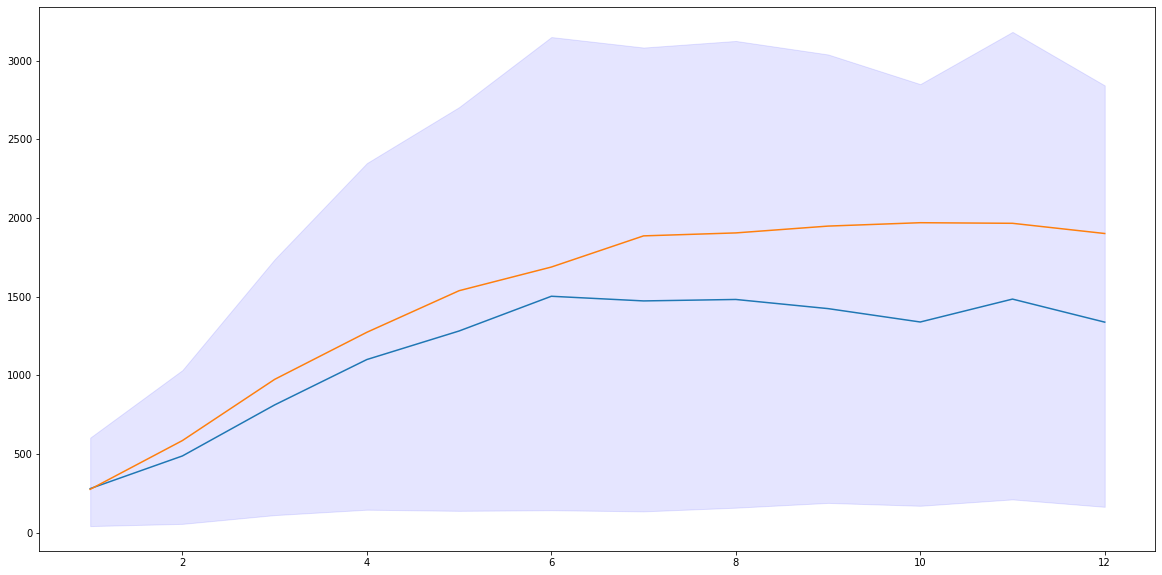

In [159]:
tau = np.arange(1,13)
fig, ax = plt.subplots()
ax.plot(tau,corr)
ax.fill_between(tau, (corr-lower), (corr+upper), color='b', alpha=.1)

ax.plot(tau,base)
#ax.fill_between(tau, (base-lower_base), (base+upper_base), color='r', alpha=.1)

In [27]:
lower = np.array(lower)/N
upper = np.array(upper)/N
lower_base = np.array(lower_base)/N
upper_base = np.array(upper_base)/N

In [38]:
lower = np.array(lower)
upper = np.array(upper)
lower_base = np.array(lower_base)
upper_base = np.array(upper_base)

In [39]:
corr_soil

[292.3819076086086,
 577.6923119716764,
 911.4826850468761,
 1148.8910282299837,
 1324.797572384358,
 1465.0156234844626,
 1512.4986885854091,
 1586.8012577842014,
 1545.2502761710625,
 1547.670134364396,
 1552.0673804700991,
 1393.68525973464]

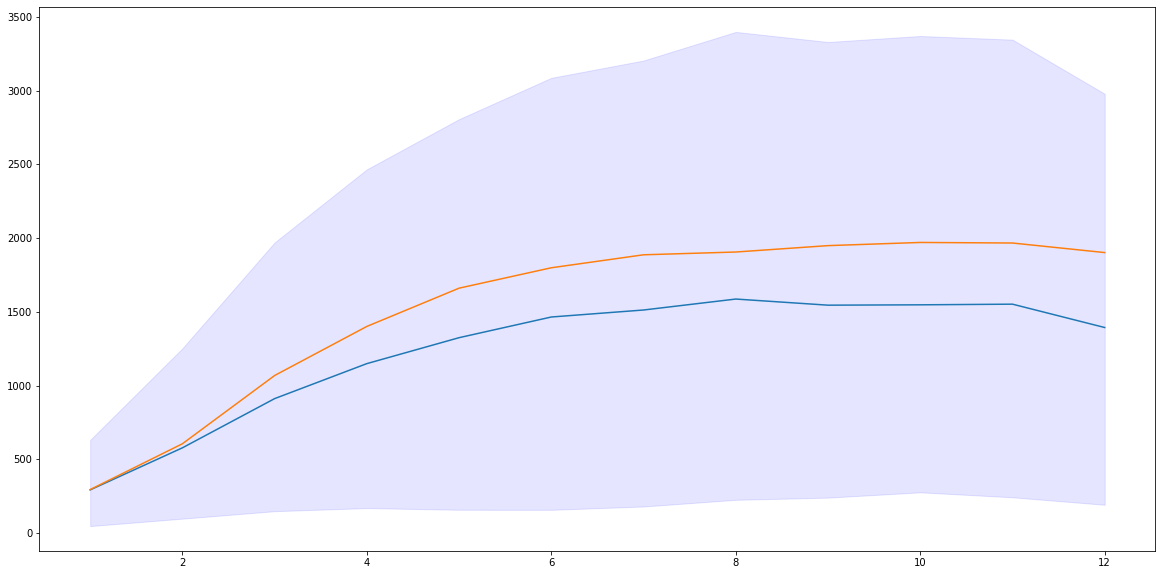

In [45]:
tau = np.arange(1,13)
fig, ax = plt.subplots()
ax.plot(tau,corr_soil)
ax.fill_between(tau, (corr_soil-lower), (corr_soil+upper), color='b', alpha=.1)

ax.plot(tau,base)
#ax.fill_between(tau, (base-lower_base), (base+upper_base), color='r', alpha=.1)